# SMS Spam Classifer using ML 

#### Can clssify sms/email as spam

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## 1. Data Cleaning

In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

### Replacing the column names by more suitable names

In [5]:
df.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace=True)

In [6]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [8]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Checking for missing and duplicate values

In [9]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates(keep='first') # Removing duplicated values

In [12]:
df.shape

(5169, 2)

In [13]:
df.duplicated().sum() ## No duplicates

0

## 2. Expolatry Data Analysis

In [14]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

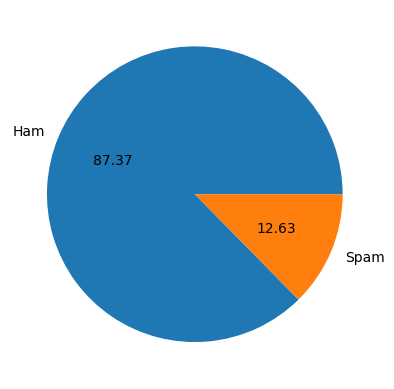

In [16]:
plt.pie(df['Target'].value_counts(), labels=['Ham', 'Spam'], autopct='%0.2f')
plt.show()

In [17]:
# Data is largely imbalanced

In [18]:
# !pip install nltk

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sharshn21/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# New column num_characters
df['num_chars'] = df['Text'].apply(len)

In [22]:
# New column - num_words
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
# New column - num_sentences
df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,Target,Text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
## Data Decription for Ham
df[df['Target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# Data description for Spam
df[df['Target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot: xlabel='num_chars', ylabel='Count'>

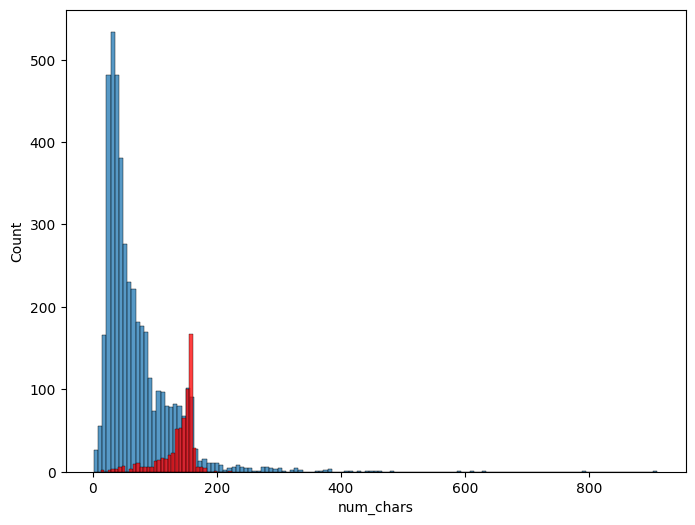

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['Target'] == 0]['num_chars'])
sns.histplot(df[df['Target'] == 1]['num_chars'], color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

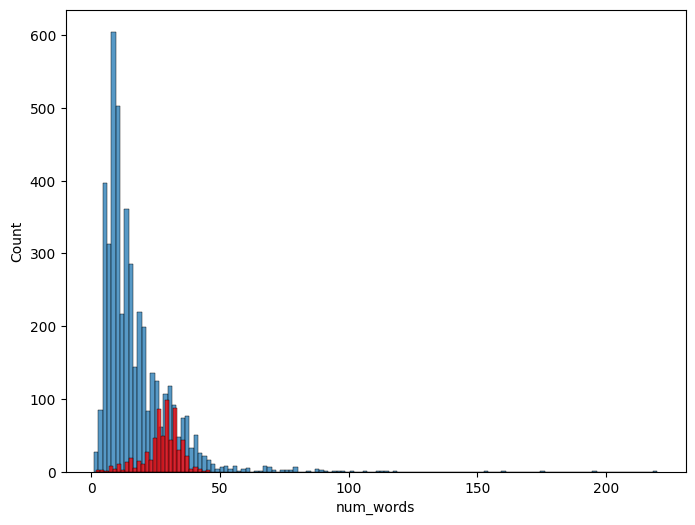

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'], color='red')

<AxesSubplot: xlabel='num_sentences', ylabel='Count'>

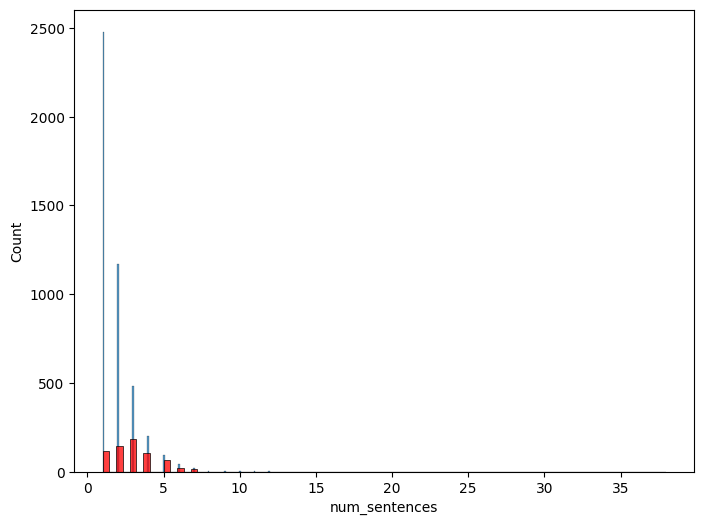

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['Target'] == 0]['num_sentences'])
sns.histplot(df[df['Target'] == 1]['num_sentences'], color='red')

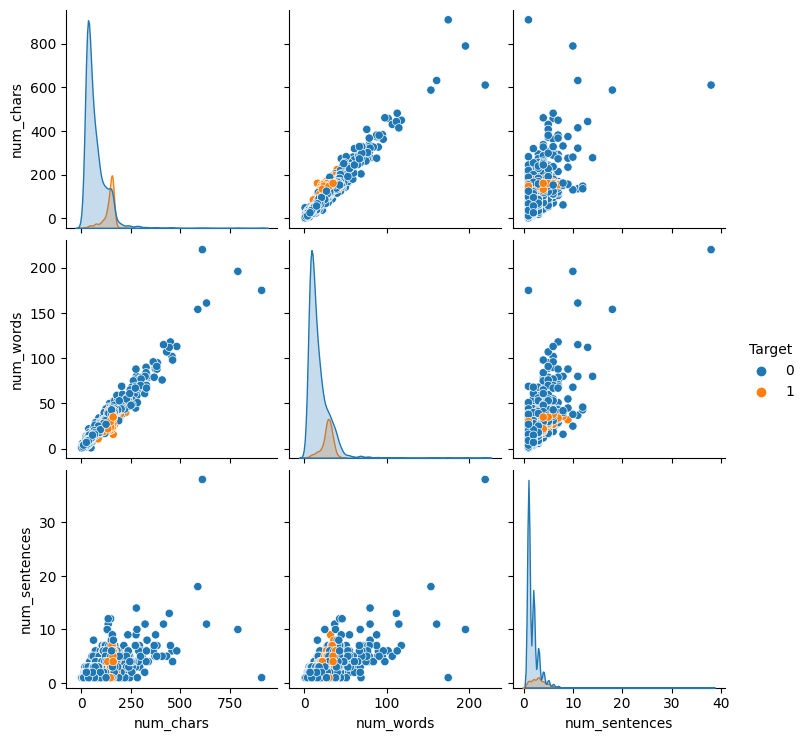

In [30]:
sns.pairplot(df, hue='Target')

In [31]:
## Many oultliers in dataset

/tmp/ipykernel_920/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

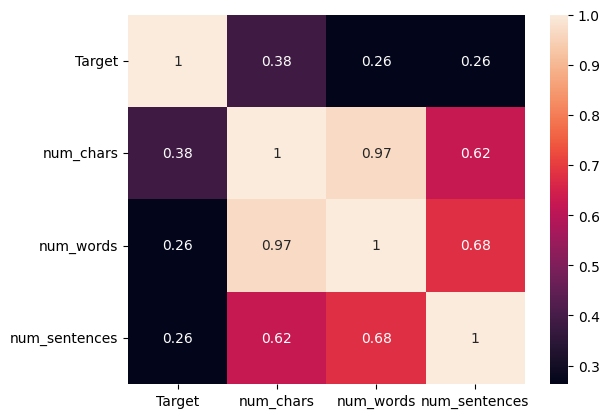

In [32]:
sns.heatmap(df.corr(), annot=True)

In [33]:
## As there is a strong relation between colummns, hence we drop two columns

## 3. Data Preprocessing
 Lower case \
 Tokenization \
 Removing special Characters \
 Removing stop words and punctuatution \
 Stemming (root form of words)

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sharshn21/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

def transform_text(text):
    global ps
    
    text = text.lower()
    text = nltk.word_tokenize(text)
    x = []
    for word in text:
        if word.isalnum():
            x.append(word)
    
    y = []
    for _word in x:
        if _word not in stopwords.words('english') and _word not in string.punctuation:
            y.append(_word)
            
    tokenized_text = []
    for term in y:
        tokenized_text.append(ps.stem(term))    
    
            
    return " ".join(tokenized_text)

In [36]:
transform_text('Hi how are you Jaina')

'hi jaina'

In [37]:
transform_text('I loved the YT lectures on Machine Learning. How about you ?')

'love yt lectur machin learn'

In [38]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [39]:
df.head()

,Target,Text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
# !pip install wordcloud

In [41]:
from wordcloud import WordCloud
wc = WordCloud(height=1000, width=1000, min_font_size=10, background_color='white')

In [42]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep = ''))

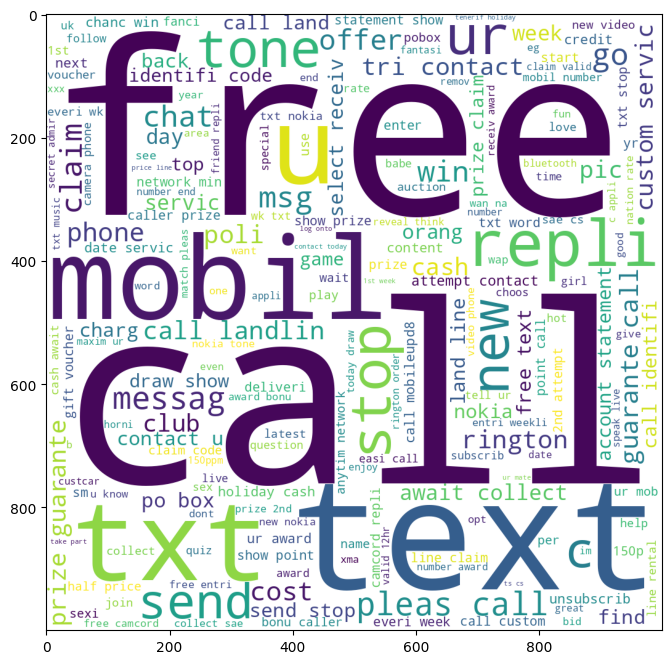

In [43]:
plt.figure(figsize=(12, 8))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep = ''))

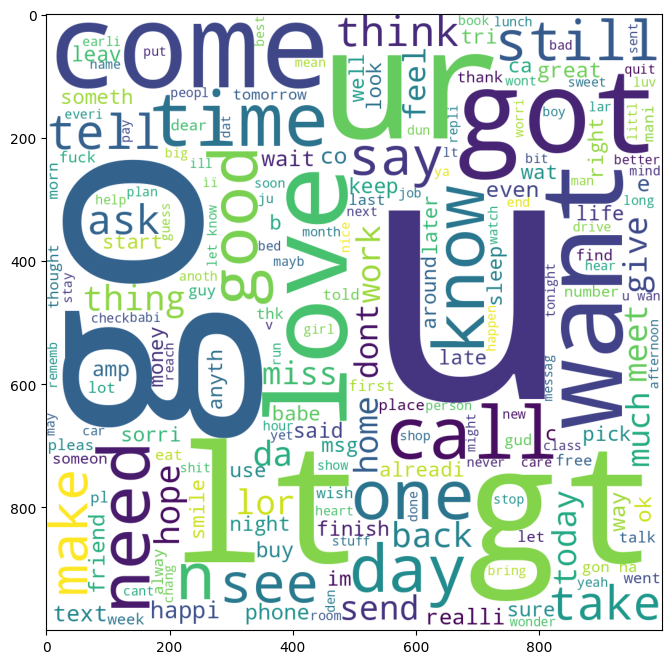

In [45]:
plt.figure(figsize=(12, 8))
plt.imshow(ham_wc)

## 4. Model Building

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidv = TfidfVectorizer()

In [47]:
df['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [48]:
X  = cv.fit_transform(df['transformed_text']).toarray()
y = df['Target'].values

In [49]:
print(X.shape)
y.shape

(5169, 6708)


(5169,)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Byes Algorithm

In [51]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [52]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [53]:
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)

BernoulliNB()

In [54]:
bnb_y_pred = bnb_model.predict(X_test)
np.concatenate((bnb_y_pred.reshape(len(bnb_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1]])

In [55]:
mnb_y_pred = mnb_model.predict(X_test)
np.concatenate((mnb_y_pred.reshape(len(mnb_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1]])

In [56]:
nb_y_pred = nb_model.predict(X_test)
np.concatenate((nb_y_pred.reshape(len(nb_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1]])

## SVM Model 

In [57]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', random_state=0)
svc_model.fit(X_train, y_train)

SVC(random_state=0)

In [58]:
svm_y_pred = svc_model.predict(X_test)
np.concatenate((svm_y_pred.reshape(len(svm_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1]])

## Random Forest Classification

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [60]:
rf_y_pred = rf_model.predict(X_test)
np.concatenate((rf_y_pred.reshape(len(rf_y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1]])

## Model Evaluation

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score, recall_score, f1_score
def get_model_evalution(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    precision = average_precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'accuracy: {accuracy}')
    print(f'confusion matrix: \n {matrix}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'F1 score: {f1}')

In [62]:
get_model_evalution(y_test, bnb_y_pred)

accuracy: 0.9661508704061895
confusion matrix: 
 [[881   4]
 [ 31 118]]
precision: 0.7959615136199878
recall: 0.7919463087248322
F1 score: 0.8708487084870848


In [63]:
get_model_evalution(y_test, mnb_y_pred) # Multimonial Naive Byes

accuracy: 0.9709864603481625
confusion matrix: 
 [[869  16]
 [ 14 135]]
precision: 0.8235756534375953
recall: 0.9060402684563759
F1 score: 0.9


In [64]:
get_model_evalution(y_test, nb_y_pred) # Naive Byes

accuracy: 0.8762088974854932
confusion matrix: 
 [[774 111]
 [ 17 132]]
precision: 0.49767391656582
recall: 0.8859060402684564
F1 score: 0.673469387755102


In [65]:
get_model_evalution(y_test, rf_y_pred) # Random Forest 

accuracy: 0.9690522243713733
confusion matrix: 
 [[885   0]
 [ 32 117]]
precision: 0.8161826749574858
recall: 0.785234899328859
F1 score: 0.8796992481203008


In [66]:
get_model_evalution(y_test, svm_y_pred) # SVM

accuracy: 0.971953578336557
confusion matrix: 
 [[884   1]
 [ 28 121]]
precision: 0.832503442744253
recall: 0.8120805369127517
F1 score: 0.892988929889299


## Storing Support Vector Machine and Mulitnimial Naive Byes ML Model into Pickle File

In [67]:
import pickle
pickle.dump(svc_model, open('./ML Models/SupportVectorMachine_model.pkl', 'wb'))
pickle.dump(mnb_model, open('./ML Models/MultinomialNaiveByes_model.pkl', 'wb'))

In [68]:
pickle.dump(cv, open('./Vectorizers/cv_vectorizer.pkl', 'wb'))

In [69]:
pickle.dump(tfidv, open('./Vectorizers/tfidv_vectorizer.pkl', 'wb'))